In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Load Data

In [20]:
df = pd.read_csv("cardio_train.csv",sep=";")
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


## 2. Basic Structure of dataset

In [4]:
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
print("Basic Info: ",df.info())

Rows: 70000, Columns: 13
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB
Basic Info:  None


## 3. Describe the data and find nunique values

In [5]:
print(df.nunique())
df.describe().T

id             70000
age             8076
gender             2
height           109
weight           287
ap_hi            153
ap_lo            157
cholesterol        3
gluc               3
smoke              2
alco               2
active             2
cardio             2
dtype: int64


,count,mean,std,min,25%,50%,75%,max
id,70000.0,49972.419900,28851.302323,0.0,25006.75,50001.5,74889.25,99999.0
age,70000.0,19468.865814,2467.251667,10798.0,17664.00,19703.0,21327.00,23713.0
gender,70000.0,1.349571,0.476838,1.0,1.00,1.0,2.00,2.0
height,70000.0,164.359229,8.210126,55.0,159.00,165.0,170.00,250.0
weight,70000.0,74.205690,14.395757,10.0,65.00,72.0,82.00,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.00,120.0,140.00,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.00,80.0,90.00,11000.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.00,1.0,2.00,3.0
gluc,70000.0,1.226457,0.572270,1.0,1.00,1.0,1.00,3.0
smoke,70000.0,0.088129,0.283484,0.0,0.00,0.0,0.00,1.0


## 4. Identify null and duplicate data

In [6]:
print(df.isnull().sum())
print("Duplicates:",df.duplicated().sum())

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64
Duplicates: 0


## 5. Value count of Target column

In [7]:
df["cardio"].value_counts()

cardio
0    35021
1    34979
Name: count, dtype: int64

## 6. Correlation matrix of basic columns

In [8]:
df[["age","weight","ap_hi","ap_lo","cholesterol","gluc","smoke","alco","active","cardio"]].corr()

,age,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
age,1.000000,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159
weight,0.053684,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660
ap_hi,0.020764,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475
ap_lo,0.017647,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719
cholesterol,0.154424,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
gluc,0.098703,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
smoke,-0.047633,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486
alco,-0.029723,0.067113,0.001408,0.010601,0.035760,0.011246,0.340094,1.000000,0.025476,-0.007330
active,-0.009927,-0.016867,-0.000033,0.004780,0.009911,-0.006770,0.025858,0.025476,1.000000,-0.035653
cardio,0.238159,0.181660,0.054475,0.065719,0.221147,0.089307,-0.015486,-0.007330,-0.035653,1.000000


## 7. GroupBy on the columns to find out relation of that

In [9]:
print(df.groupby("cholesterol")["cardio"].mean())
print(df.groupby("gluc")["cardio"].mean())
print(df.groupby("smoke")["cardio"].mean())
print(df.groupby("active")["cardio"].mean())

cholesterol
1    0.440107
2    0.602157
3    0.765435
Name: cardio, dtype: float64
gluc
1    0.480590
2    0.593064
3    0.622022
Name: cardio, dtype: float64
smoke
0    0.502107
1    0.474793
Name: cardio, dtype: float64
active
0    0.535774
1    0.490891
Name: cardio, dtype: float64


## 8. Distribution graphs of numeric columns

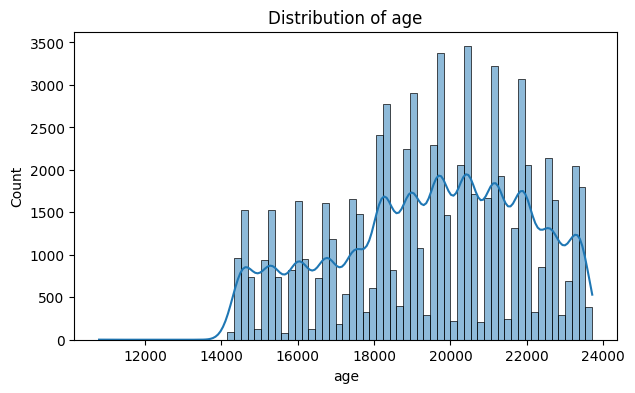

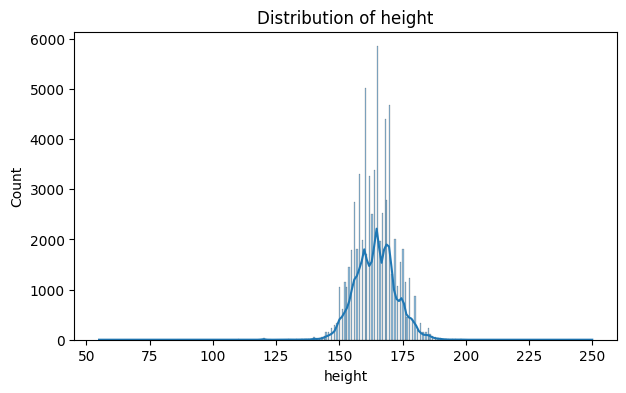

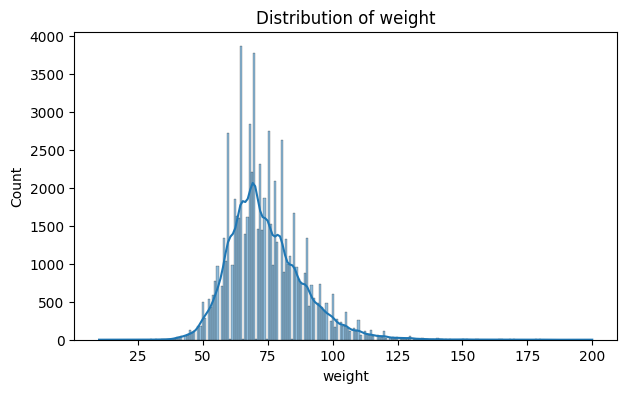

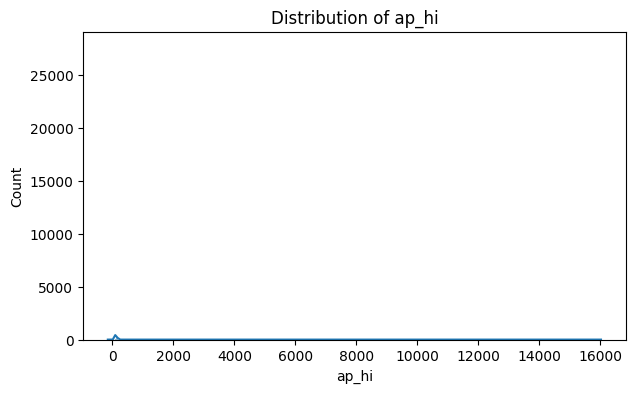

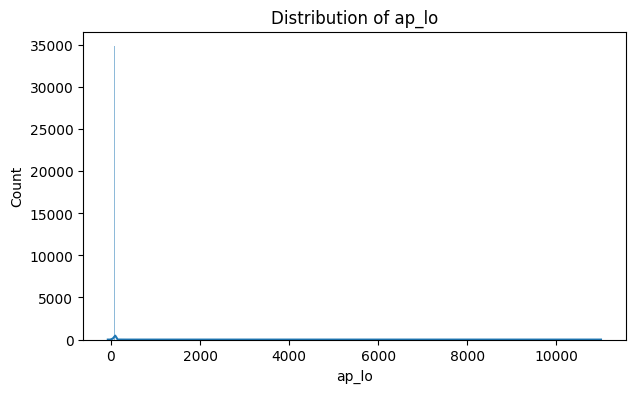

In [15]:
numeric_cols = ["age","height","weight","ap_hi","ap_lo"]

for col in numeric_cols:
    plt.figure(figsize=(7,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

## 9. Compare the basic categorical columns with the target
for the categorical graph representation countplot is used

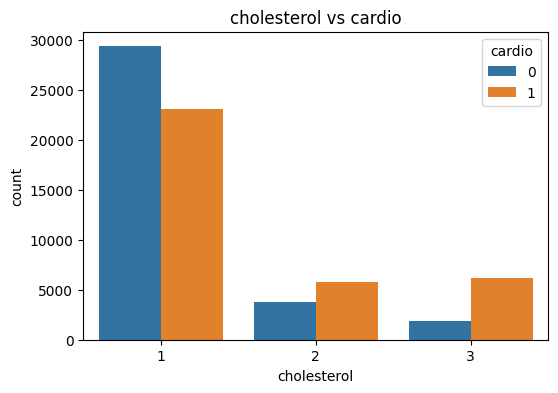

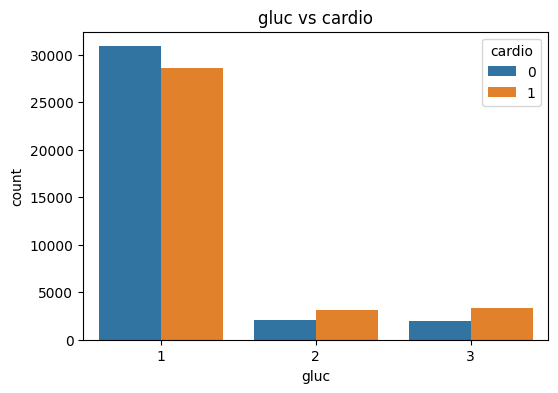

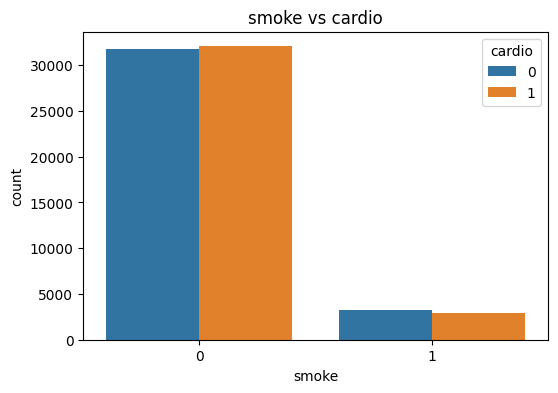

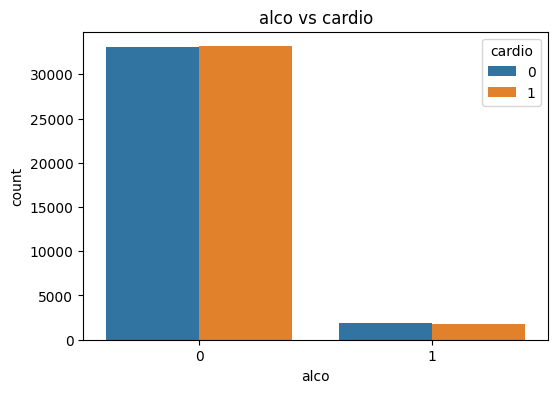

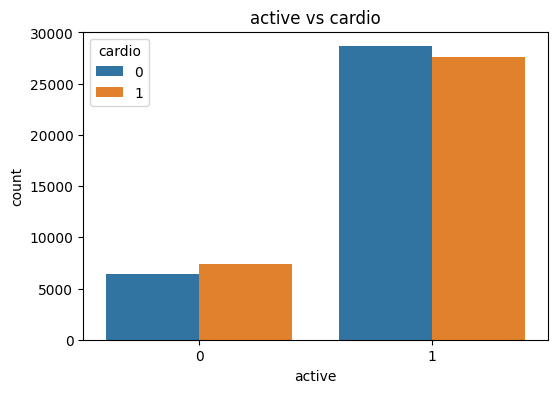

In [31]:
categories_cols = ['cholesterol','gluc','smoke','alco','active']
for col in categories_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=f'{col}', hue='cardio')
    plt.title(f'{col} vs cardio')
    plt.show()

## 10. Scatter plot for the 'ap_hi' and 'ap_lo'
helps to findout the pattern

Text(0.5, 1.0, 'Scatter plot of ap_hi and ap_lo')

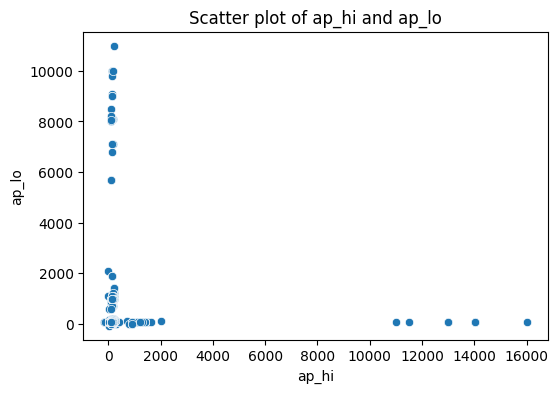

In [33]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="ap_hi", y="ap_lo")
plt.title('Scatter plot of ap_hi and ap_lo')

## 11. Boxplot for the 'ap_hi' and 'ap_lo'
helps to visulaize the outliers.

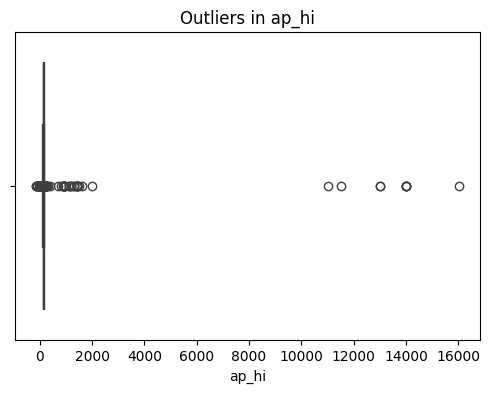

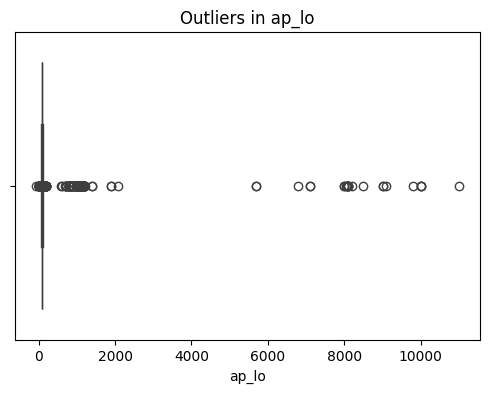

In [34]:
for col in ["ap_hi", "ap_lo"]:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Outliers in {col}")
    plt.show()

## 8. drop the 'id' column so we can identify the duplicates and remove that

In [21]:
df2 = df.copy()
df2.drop('id', axis=1, inplace=True)

print(f'Duplicates: {df2.duplicated().sum()}')
print(df2[df2.duplicated()])
df2.drop_duplicates(inplace=True)
print(f'Duplicates: {df2.duplicated().sum()}')

Duplicates: 24
         age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
10562  20495       1     165    70.0    120     80            1     1      0   
21784  16793       1     165    68.0    120     80            1     1      0   
38505  18988       1     164    65.0    120     80            1     1      0   
40365  14552       1     158    64.0    120     80            1     1      0   
42450  18353       1     169    67.0    120     80            1     1      0   
44653  16937       2     170    70.0    120     80            1     1      0   
45125  21280       1     165    65.0    120     80            1     1      0   
45748  22077       1     175    69.0    120     80            1     1      0   
45810  21230       1     164    62.0    120     80            1     1      0   
48917  21945       1     165    60.0    120     80            1     1      0   
50432  17493       2     169    74.0    120     80            1     1      0   
52552  21943       1     

## 9. Make height and weight columns meaningfull like real life
like, 120 <= height <= 220 and 30 <= weight <= 200

In [23]:
df2 = df2[(df2['height'] >= 120) & (df2['height'] <= 220)]
df2 = df2[(df2['weight'] >= 30) & (df2['weight'] <= 200)]
df2.shape

(69878, 12)

## 11. Clean "ap_lo" and "ap_hi" by removing unreal values
like, 90 <= api_hi <= 240 and 70 <= api_lo <= 140 that's the range \
and ap_hi < ap_lo is very unreal

In [24]:
df2 = df2[(df2['ap_hi'] >= 70) & (df2['ap_hi'] <= 240)]
df2 = df2[(df2['ap_lo'] >= 40) & (df2['ap_lo'] <= 140)]
df2 = df2[df2['ap_hi'] > df2['ap_lo']]
df2.shape

(68547, 12)

## 12. Correlation graph of cleaned data

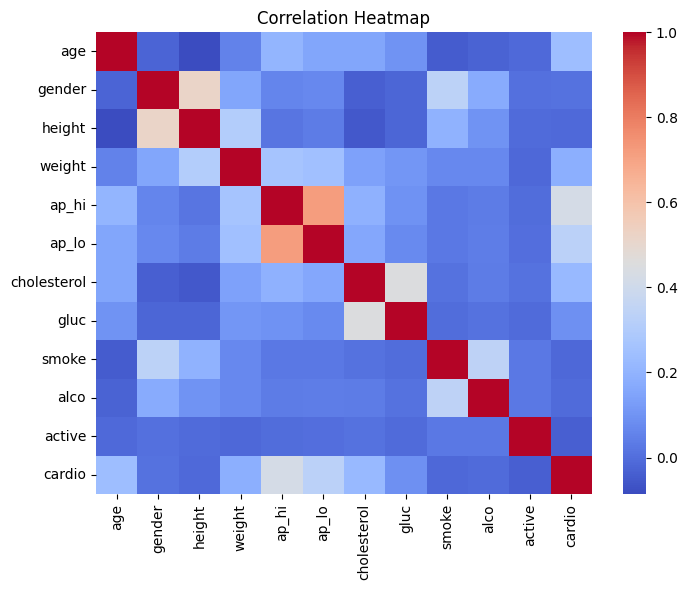

In [28]:
plt.figure(figsize=(8,6))
sns.heatmap(df2.corr(), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

## 13. After cleaning distribution of numeric columns values

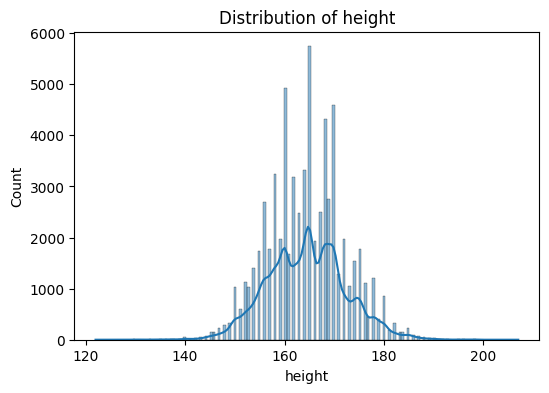

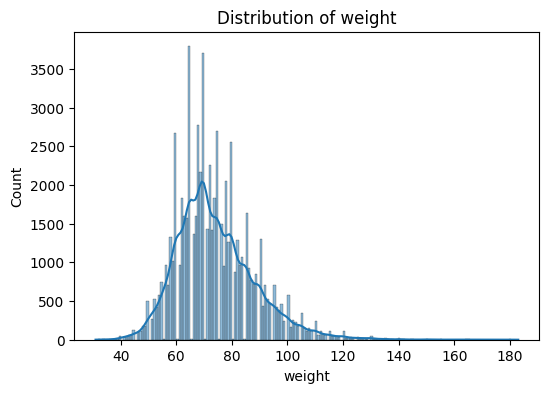

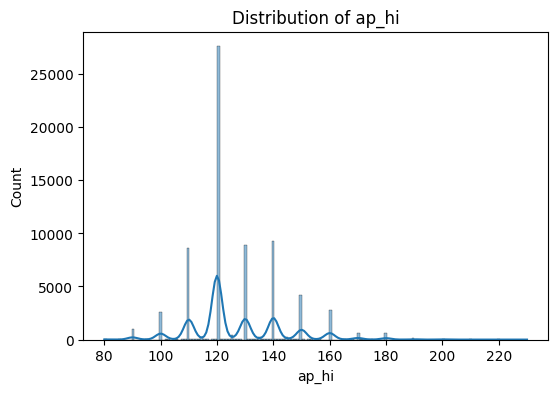

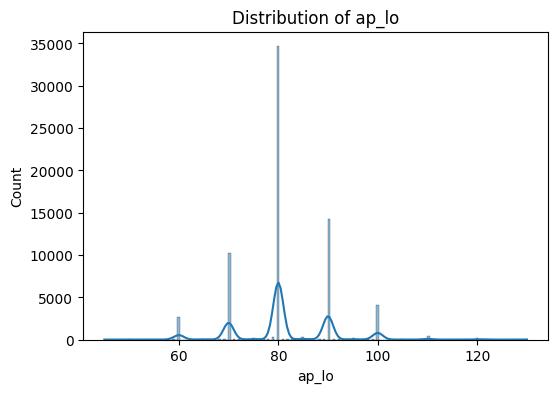

In [13]:
numeric_cols = ['height','weight','ap_hi','ap_lo']

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df2[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

## 14. After cleaning boxplot of 'ap_hi' and 'ap_lo'

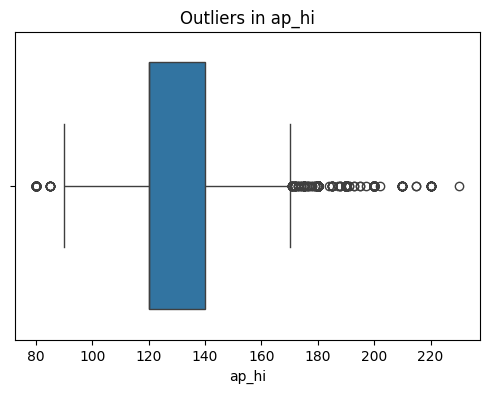

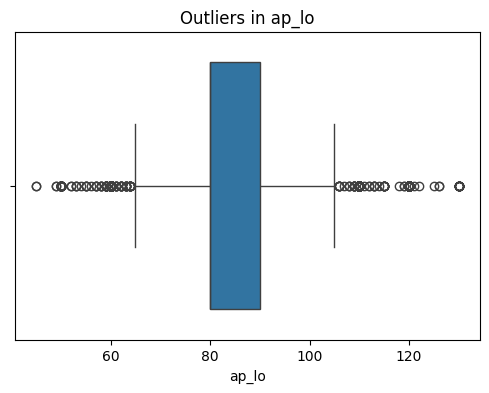

In [14]:
for col in ["ap_hi", "ap_lo"]:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df2[col])
    plt.title(f"Outliers in {col}")
    plt.show()

## 15. Now export the cleaned data to csv file for further process

In [25]:
df2.to_csv('cleaned_cardio.csv', index=False)

data = pd.read_csv('cleaned_cardio.csv')
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
